In [96]:
type(df_top_artists.iloc[0]["genres"])

str

In [95]:
import pandas as pd

df_top_artists = pd.read_csv("../Data/topArtists.csv")

# all the data (columns) given
# Index(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name',
#        'popularity', 'type', 'uri'],
    #   dtype='object')

df_top_artists.head()




,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/3...,"{'href': None, 'total': 89419924}","['canadian hip hop', 'canadian pop', 'hip hop'...",https://api.spotify.com/v1/artists/3TVXtAsR1In...,3TVXtAsR1Inumwj472S9r4,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Drake,93,artist,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 17157752}","['atl hip hop', 'hip hop', 'rap', 'southern hi...",https://api.spotify.com/v1/artists/1RyvyyTE3xz...,1RyvyyTE3xzB2ZywiAwp0i,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Future,90,artist,spotify:artist:1RyvyyTE3xzB2ZywiAwp0i
2,{'spotify': 'https://open.spotify.com/artist/3...,"{'href': None, 'total': 4848678}","['pluggnb', 'rage rap']",https://api.spotify.com/v1/artists/3qiHUAX7zY4...,3qiHUAX7zY4Qnjx8TNUzVx,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Yeat,81,artist,spotify:artist:3qiHUAX7zY4Qnjx8TNUzVx
3,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 29648507}","['rap', 'slap house']",https://api.spotify.com/v1/artists/0Y5tJX1MQlP...,0Y5tJX1MQlPlqiwlOH1tJY,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Travis Scott,91,artist,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY
4,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 18637684}","['atl hip hop', 'hip hop', 'rap']",https://api.spotify.com/v1/artists/1URnnhqYAYc...,1URnnhqYAYcrqrcwql10ft,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",21 Savage,87,artist,spotify:artist:1URnnhqYAYcrqrcwql10ft


In [97]:
from collections import Counter
import ast



#ast converts the genres string into a list 
df_top_artists['genres'] = df_top_artists['genres'].apply(ast.literal_eval)
all_genres = [genre for sublist in df_top_artists['genres'] for genre in sublist]

# Use Counter to count occurrences of each genre
genre_counter = Counter(all_genres)

def list_to_string(genre_list):
    return ', '.join(genre_list)

df_top_artists['genres'] = df_top_artists['genres'].apply(list_to_string)




In [107]:
# List of genres to check for
genres_to_check = []

for genre in genre_counter.most_common(3):
    genres_to_check.append(genre[0])


# Add a new column to mark if any of the genres are present
df_top_artists['Contains_Genres'] = df_top_artists['genres'].apply(lambda x: any(genre in x for genre in genres_to_check))

df_top_artists.head()

,external_urls,followers,genres,href,id,images,name,popularity,type,uri,Contains_Genres
0,{'spotify': 'https://open.spotify.com/artist/3...,"{'href': None, 'total': 89419924}","canadian hip hop, canadian pop, hip hop, pop r...",https://api.spotify.com/v1/artists/3TVXtAsR1In...,3TVXtAsR1Inumwj472S9r4,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Drake,93,artist,spotify:artist:3TVXtAsR1Inumwj472S9r4,True
1,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 17157752}","atl hip hop, hip hop, rap, southern hip hop, trap",https://api.spotify.com/v1/artists/1RyvyyTE3xz...,1RyvyyTE3xzB2ZywiAwp0i,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Future,90,artist,spotify:artist:1RyvyyTE3xzB2ZywiAwp0i,True
2,{'spotify': 'https://open.spotify.com/artist/3...,"{'href': None, 'total': 4848678}","pluggnb, rage rap",https://api.spotify.com/v1/artists/3qiHUAX7zY4...,3qiHUAX7zY4Qnjx8TNUzVx,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Yeat,81,artist,spotify:artist:3qiHUAX7zY4Qnjx8TNUzVx,True
3,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 29648507}","rap, slap house",https://api.spotify.com/v1/artists/0Y5tJX1MQlP...,0Y5tJX1MQlPlqiwlOH1tJY,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Travis Scott,91,artist,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,True
4,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 18637684}","atl hip hop, hip hop, rap",https://api.spotify.com/v1/artists/1URnnhqYAYc...,1URnnhqYAYcrqrcwql10ft,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",21 Savage,87,artist,spotify:artist:1URnnhqYAYcrqrcwql10ft,True


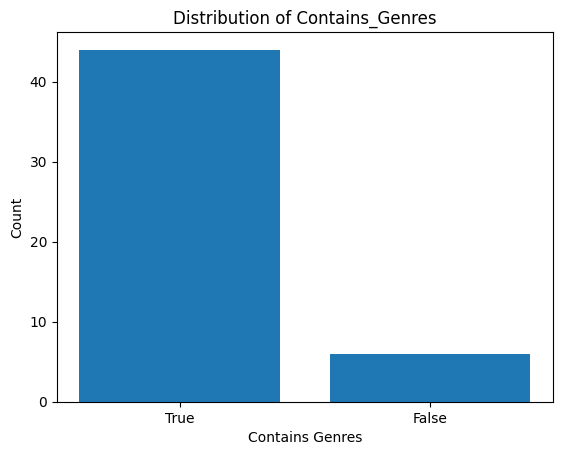

In [108]:


# Count the occurrences of True and False
contains_genres_counts = df_top_artists['Contains_Genres'].value_counts()

# Plot the bar chart
plt.bar(contains_genres_counts.index.astype(str), contains_genres_counts.values)
plt.title('Distribution of Contains_Genres')
plt.xlabel('Contains Genres')
plt.ylabel('Count')
plt.show()


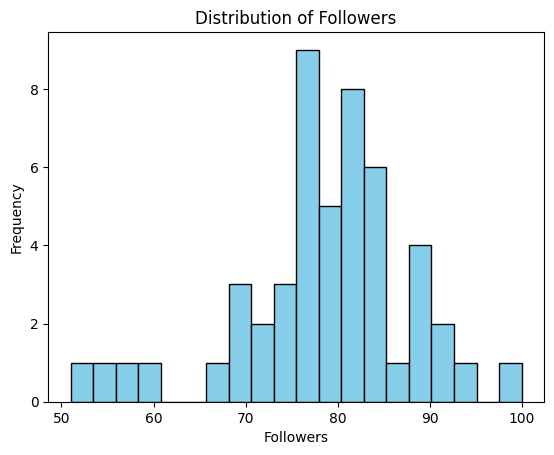

In [71]:
import matplotlib.pyplot as plt

popularity_data = df_top_artists['popularity']

# Create a histogram
plt.hist(popularity_data, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Distribution of Followers')

# Show plot
plt.show()
